In [18]:
import pandas as pd 
import matplotlib as plt 

In [ ]:
import pandas as pd 

# Necessary filter 

# Load csv file 
df = pd.read_csv("actes-criminels.csv")

# Keep only motor vehicule theft 
df = df[df['CATEGORIE'] == 'Vol de véhicule à moteur']

# Convert DATE to datetime 
df['DATE'] = pd.to_datetime(df['DATE'])

# Drop rows where the given columns have missing values (all rows with no location)
df = df.dropna(subset=['X', 'Y', 'LONGITUDE', 'LATITUDE'])

# df = df[df['DATE'].dt.year == 2015]

print(df)

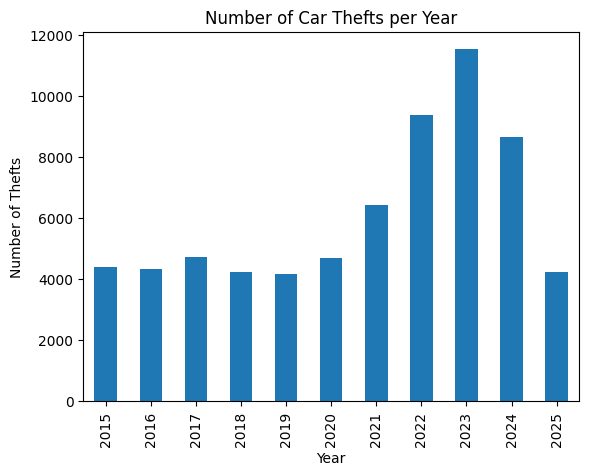

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 

# Bar chart (year) 

# Load csv file 
df = pd.read_csv("actes-criminels.csv")

# Keep only motor vehicule theft 
df = df[df['CATEGORIE'] == 'Vol de véhicule à moteur']

# Convert DATE to datetime 
df['DATE'] = pd.to_datetime(df['DATE'])

def car_thefts_over_years(df): 
    thefts_per_year = df.groupby(df['DATE'].dt.year).size()
    # print(thefts_per_year)
    thefts_per_year.plot(kind='bar', title='Number of Car Thefts per Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Thefts')
    plt.show()

car_thefts_over_years(df)


In [ ]:
import folium
from folium.plugins import MarkerCluster, HeatMap
import json
import pandas as pd 

# Cluster map 

# Load csv file 
df = pd.read_csv("actes-criminels.csv")

# Keep only motor vehicule theft 
df = df[df['CATEGORIE'] == 'Vol de véhicule à moteur']

# Convert DATE to datetime 
df['DATE'] = pd.to_datetime(df['DATE'])

df = df.dropna(subset=['X', 'Y', 'LONGITUDE', 'LATITUDE'])

df = df[(df['DATE'].dt.year == 2015)]


file_path = "/Users/jessi/Downloads/Montreal.geojson"

with open(file_path, 'r') as f: 
    geojson_data = json.load(f) 

map = folium.Map(location = [45.5500, -73.6667], zoom_start = 11)

# Mark as HeatMap, takes the least time 
#heat_data = df[['LATITUDE', 'LONGITUDE']].values.tolist()
#HeatMap(heat_data, radius=8, blur=12).add_to(map)

# Mark as Cluster
cluster = MarkerCluster().add_to(map)

for index, row in df.iterrows():
    folium.Marker(
        location = [row["LATITUDE"], row["LONGITUDE"]], 
        popup = f"Date: {row["DATE"]}"
    ).add_to(cluster)


# Mark as points on the map
#for _, row in df.iterrows(): 
    #folium.CircleMarker(
    #location = [ row["LATITUDE"], row["LONGITUDE"]], 
    #popup = f"Name: {row['DATE']}", 
    #radius = 3, 
    #fill = True, 
    #color = "red",
    #fill_opacity = 0.7
#).add_to(map)

folium.GeoJson(geojson_data).add_to(map)


map.save("map.html")

In [ ]:
import folium
from folium.plugins import MarkerCluster
import json
import pandas as pd 

# Cluster map WITH filter 

# Load csv file 
df = pd.read_csv("actes-criminels.csv")

# Keep only motor vehicle theft 
df = df[df['CATEGORIE'] == 'Vol de véhicule à moteur']

# Convert DATE to datetime 
df['DATE'] = pd.to_datetime(df['DATE'])

# Drop rows without coordinates
df = df.dropna(subset=['LONGITUDE', 'LATITUDE'])

# Load GeoJSON
file_path = "/Users/jessi/Downloads/Montreal.geojson"
with open(file_path, 'r') as f: 
    geojson_data = json.load(f) 

# Create map
map = folium.Map(location=[45.5500, -73.6667], zoom_start=11)

# Create filters by year
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]

for year in years: 
    fg = folium.FeatureGroup(name=str(year))  # FeatureGroup for year
    cluster = MarkerCluster().add_to(fg)      # Attach cluster to FeatureGroup

    df_year = df[df['DATE'].dt.year == year]

    for index, row in df_year.iterrows(): 
        folium.Marker(
            location=[row['LATITUDE'], row['LONGITUDE']], 
            popup=f"Date: {row['DATE']}"
        ).add_to(cluster)
    
    fg.add_to(map)  # Add feature group to map

# Add borough outlines
folium.GeoJson(geojson_data, name="Boroughs").add_to(map)

# Layer control (shows filters on side)
folium.LayerControl(collapsed=False).add_to(map)

# Save map
map.save("map.html")


In [ ]:
import pandas as pd 

# Most vulnerable season (DRAFT)

# Load csv file 
df = pd.read_csv("actes-criminels.csv")

# Keep only motor vehicule theft 
df = df[df['CATEGORIE'] == 'Vol de véhicule à moteur']

# Convert DATE to datetime 
df['DATE'] = pd.to_datetime(df['DATE'])


# spring = 3, 4, 5 summer = 6, 7, 8 fall = 9, 10, 11 winter = 12, 1, 2
def check_season(season):
    match season: 
        case "spring": return df[(df['DATE'].dt.month <= 5) & (df['DATE'].dt.month > 2)]
        case "summer": return df[(df['DATE'].dt.month <= 8) & (df['DATE'].dt.month > 5)]
        case "fall": return df[(df['DATE'].dt.month <= 11) & (df['DATE'].dt.month > 8)]
        case "winter": return df[(df['DATE'].dt.month <= 2) or (df['DATE'].dt.month == 12)]



In [ ]:
import pandas as pd
import datetime

# Percent increase or decrease compared to last month 

# Load csv file 
df = pd.read_csv("actes-criminels.csv")

# Keep only motor vehicule theft 
df = df[df['CATEGORIE'] == 'Vol de véhicule à moteur']

# Convert DATE to datetime 
df['DATE'] = pd.to_datetime(df['DATE'])

# Get current month and previous month 
current_month = datetime.datetime.now().month
if current_month == 1: 
    last_month = 12; 
else: 
    last_month = current_month - 1 

# Get current year 
current_year = datetime.datetime.now().year 

# Get current day 
current_day = datetime.datetime.now().day


num_thefts_last_month = df[(df['DATE'].dt.year == current_year) & (df['DATE'].dt.month == last_month) & (df['DATE'].dt.day <= current_day)].shape[0]

num_thefts_this_month = df[(df['DATE'].dt.year == current_year) & (df['DATE'].dt.month == current_month) & (df['DATE'].dt.day <= current_day)].shape[0]

if num_thefts_this_month < num_thefts_last_month: 
    percent_decrease = int((num_thefts_this_month / num_thefts_last_month) * 100)
    print(percent_decrease)
else: 
    percent_increase = int((num_thefts_last_month / num_thefts_this_month) * 100)
    print(percent_increase)

19
